# Exercises

In [2]:
%%html
<style>
    .gray {
        background-color: #dfe0e8;
    }
</style>

## Probability Practice

<div class="gray">
    <strong>Part A.</strong> Visitors to your website are asked to answer a single survey question before they get access to the content on the page. Among all of the users, there are two categories: Random Clicker (RC), and Truthful Clicker (TC). There are two possible answers to the survey: yes and no. Random clickers would click either one with equal probability. You are also giving the information that the expected fraction of random clickers is 0.3. After a trial period, you get the following survey results: 65\% said Yes and 35\% said No. What fraction of people who are truthful clickers answered yes?  Hint: use the rule of total probability.
</div>

Solving for $P(CY | TC)$.

Rule of total probability:
$$
P(A) = \sum_{i=1}^{N}A \cap B_i = \sum_{i=1}^{N}P(B_i)P(A | B_i)
$$
$$
P(B_i,B_j) = 0 \,\,\,(i \neq j)
$$
$$
\sum_{i=1}^{N}P(B_i)=1
$$

Note: I'm using CY as shorthand for click yes and CN as shorthand for click no
Given:
- $P(CY | RC) = 0.5$ and $P(CN | RC) = 0.5$
- $P(RC) = 0.3$ and $P(TC) = 0.7$
- $P(CY)=0.65$ and $P(CN)=.35$

$$
P(CY | TC) = \frac{P(CY \cap TC)}{P(TC)}
$$

Need to determine $P(CY \cap TC)$ by using total probability theorem.

$$
P(CY) = P(CY \cap RC) + P(CY \cap TC)
$$
$$
P(CY \cap TC) = P(CY) - P(CY \cap RC) = P(CY) - P(RC)P(CY | RC) = 0.65 - 0.3(0.5) = 0.5
$$

$$
P(CY | TC) = \frac{P(CY \cap TC)}{P(TC)} = \frac{0.5}{0.7} = 71.4%
$$

71.4% of the people who are truthful clickers click yes.

<div class="gray">
    <strong>Part B.</strong> Imagine a medical test for a disease with the following two attributes:

- The sensitivity is about 0.993. That is, if someone has the disease, there is a probability of 0.993 that they will test positive.  
- The specificity is about 0.9999. This means that if someone doesn't have the disease, there is probability of 0.9999 that they will test negative.  
- In the general population, incidence of the disease is reasonably rare: about 0.0025% of all people have it (or 0.000025 as a decimal probability).</span>

Suppose someone tests positive. What is the probability that they have the disease?
</div>

Note:
- TP = Test postivie
- TN = Test negative
- D = disease
- $D^c$ = no disease

The givens are:
- $P(TP|D) = 0.993$
- $P(TN|D^c) = 0.9999$
- $P(D) = 0.000025$
- $P(D^c) = 1 - P(D) = 0.999975$

Find P(D|TP)

I know:
$$
P(D|TP) = \frac{P(D \cap TP)}{P(TP)} = \frac{P(TP|D) \, P(D)}{P(TP)} = \frac{0.993\,(0.000025)}{?}
$$

I have to solve for P(TP) before I can finish filling in this equation.

$$
P(TP) = P(TP \cap D) + P(TP \cap D^c) = P(TP|D)\,P(D) + P(TP|D^c)\,P(D^c)
$$

I have everything except for $P(TP|D^c)$ in the given information, but this can easily be derived by:
$P(TP|D^c) = 1 - P(TN|D^c) = 1 - 0.9999 = 0.0001$

Therefore:
$$
P(TP) = P(TP \cap D) + P(TP \cap D^c) = 0.993\,(0.000025) + 0.0001\,(0.999975) = 0.0001248225$
$$

Finally,
$$
P(D|TP) = \frac{P(D \cap TP)}{P(TP)} = \frac{P(TP|D) \, P(D)}{P(TP)} = \frac{0.993\,(0.000025)}{0.0001248225} = 0.19888
$$

Given that someone tests positive, they have a 19.89% of actually having the disease.

## Wrangling the Billboard Top 100

<div class="gray">
Consider the data in billboard.csv (../data/billboard.csv) containing every song to appear on the weekly Billboard Top 100 (https://www.billboard.com/charts/hot-100/) chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:
    
- performer: who performed the song
- song: the title of the song
- year: year (1958 to 2021)
- week: chart week of that year (1, 2, etc)
- week_position: what position that song occupied that week on the Billboard top 100 chart.
  
Use your skills in data wrangling and plotting to answer the following three questions.

<strong>Part A:</strong> Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks
that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular
songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer , song , and count , where count represents the
number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending
order of the count variable, so that the more popular songs appear at the top of the table. Give your table a
short caption describing what is shown in the table.

(Note: you’ll want to use both performer and song in any group_by operations, to account for the fact that
multiple unique songs can share the same title.)
</div>

In [3]:
import pandas as pd

df = pd.read_csv('data/billboard.csv')
df2 = df[['performer', 'song', 'year', 'week', 'week_position']].copy()
df2.groupby(['performer', 'song'])['week'].count()\
    .reset_index()\
    .rename(columns = {'week':'count'})\
    .sort_values(by = 'count', ascending = False)\
    .head(10)

performer  \
11194                            Imagine Dragons   
403                                   AWOLNATION   
27121                                 The Weeknd   
12026                                 Jason Mraz   
15008                                LeAnn Rimes   
18752                                OneRepublic   
14807  LMFAO Featuring Lauren Bennett & GoonRock   
12421                                      Jewel   
506                                        Adele   
4347                            Carrie Underwood   

                                      song  count  
11194                          Radioactive     87  
403                                   Sail     79  
27121                      Blinding Lights     76  
12026                            I'm Yours     76  
15008                        How Do I Live     69  
18752                       Counting Stars     68  
14807                    Party Rock Anthem     68  
12421  Foolish Games/You Were Meant For Me     65  
506                    Rolling In The Deep     65  
4347                      Before He Cheats     64

The table above displays the performer, song title, and count that represents the number of weeks the song appeared in the Billboard Top 100 since 1958 up to the 22nd week in 2021.

Radioactive is the most popular song since 1958 since it appeared in the Billboard Top 100 87 times between 1958 and partially through 2021, but the other songs give it a run for its money with Sail coming in with 79 weeks in the Billboard Top 100.

<div class="gray">
    
<strong>Part B:</strong> Is the “musical diversity” of the Billboard Top 100 changing over time? Let’s find out. We’ll measure the
musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year.
Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year,
while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100
chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021,
since we do not have complete data on either of those years. Give the figure an informative caption in which you
explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of
data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given
song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of
steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how
many times it had appeared.

</div>

Text(0, 0.5, 'unique songs')

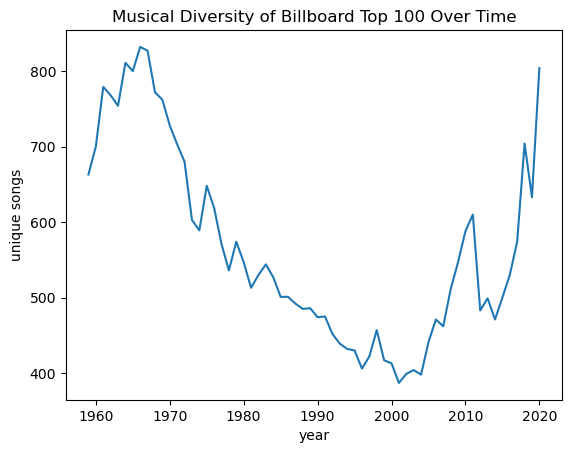

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df.copy()

# Number of unique songs in the Top 100 each year
df2['performer and song'] = df2['performer'] + df2['song']
yearly_top_nunique = df2.groupby('year')['performer and song']\
    .nunique()\
    .reset_index()\
    .rename(columns = {'performer and song':'top_nunique'})

# Remove 1958 and 2021
mask = (yearly_top_nunique['year'] != 1958) & (yearly_top_nunique['year'] != 2021)
yearly_top_nunique = yearly_top_nunique[mask]

# plot
sns.lineplot(x = yearly_top_nunique['year'], y = yearly_top_nunique['top_nunique'])
plt.title('Musical Diversity of Billboard Top 100 Over Time')
plt.ylabel('unique songs')
# display(yearly_top_nunique)

The plot above displays the musical diversity of the Billboard Top 100 from 1959 to 2021. The musical divserity is defined as the number of unique songs that appeared on the Billboard Top 100 throughout the year. Interestingly, the musical diversity appears to generally decrease from around 1965 to 200, and then it generally increases again towards 2020. It would be interesting to know what was leading to this increasing uniformity and now the increasing diversity, but I can't speculate on this without outside information.

<div class="gray">
<strong>Part C:</strong> Let’s define a “ten-week hit” as a single song that appeared on the Billboard Top 100 for at least ten
weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were “ten-week hits.” Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical
career. Give the plot an informative caption in which you explain what is shown.

Notes:
1. You might find this easier to accomplish in two distinct sets of data wrangling steps.
2. Make sure that the individuals names of the artists are readable in your plot, and that they’re not all jumbled
together. If you find that your plot isn’t readable with vertical bars, you can add a coord_flip() layer to
your plot to make the bars (and labels) run horizontally instead.
3. By default a bar plot will order the artists in alphabetical order. This is acceptable to turn in. But if you’d like
to order them according to some other variable, you can use the fct_reorder function, described in this
blog post (https://datavizpyr.com/re-ordering-bars-in-barplot-in-r/). This is optional.
</div>

Text(0.5, 0, 'Number of 10-Week Hits')

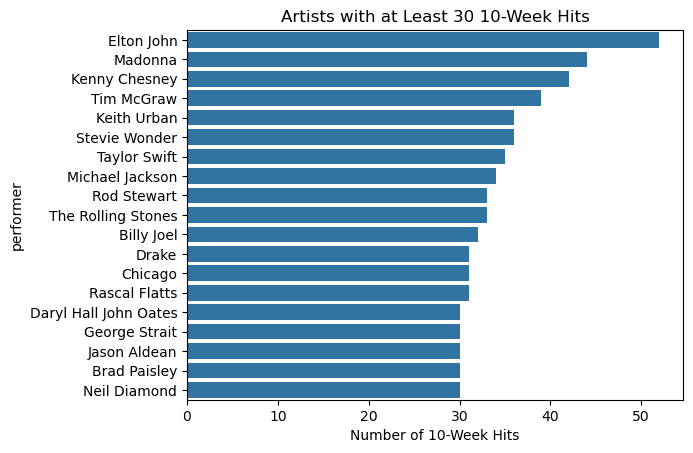

In [5]:
# second way (get 19 both ways)
# weeks_on_chart is a conseuctive measure. Want total weeks on chart instead
total_weeks_on_chart = df2.groupby(['performer', 'song']).size().reset_index().rename(columns = {0:'total_weeks_on_chart'})
# keep songs that were on chart for at least 10 weeks
ten_week_hits = total_weeks_on_chart[total_weeks_on_chart['total_weeks_on_chart']>=10]
ten_week_hits
# Get number of ten week hits for each performer
performer_ten_week_hits = ten_week_hits.groupby('performer').size()
performer_30_ten_week_hits = performer_ten_week_hits[performer_ten_week_hits >= 30]\
    .sort_values(ascending = False)\
    .reset_index()\
    .rename(columns = {0: 'n_ten_week_hits'})
# plot
sns.barplot(x = performer_30_ten_week_hits['n_ten_week_hits'], y = performer_30_ten_week_hits['performer'])
plt.title('Artists with at Least 30 10-Week Hits')
plt.xlabel('Number of 10-Week Hits')

**Edit depending on which graph you keep**
The plot above displays artists with at least 30 10-weeks hits and their number of 10-week hits. A song is defined as a 10-week hit when 

## Visual Story Telling Part 1: Green Buildings

<div class="gray">
Over the past decade, both investors and the general public have paid increasingly close attention to the benefits
of environmentally conscious buildings. There are both ethical and economic forces at work here. In commercial
real estate, issues of eco-friendliness are intimately tied up with ordinary decisions about how to allocate capital.
In this context, the decision to invest in eco-friendly buildings could pay off in at least four ways.
    
1. Every building has the obvious list of recurring costs: water, climate control, lighting, waste disposal, and so
forth. Almost by definition, these costs are lower in green buildings.
2. Green buildings are often associated with better indoor environments, the kind that are full of sunlight,
natural materials, and various other humane touches. Such environments, in turn, might result in higher
employee productivity and lower absenteeism, and might therefore be more coveted by potential tenants.
The financial impact of this factor, however, is rather hard to quantify ex ante; you cannot simply ask an
engineer in the same way that you could ask a question such as, “How much are these solar panels likely
to save on the power bill?”
3. Green buildings make for good PR. They send a signal about social responsibility and ecological
awareness, and might therefore command a premium from potential tenants who want their customers to
associate them with these values. It is widely believed that a good corporate image may enable a firm to
charge premium prices, to hire better talent, and to attract socially conscious investors.
4. Finally, sustainable buildings might have longer economically valuable lives. For one thing, they are
expected to last longer, in a direct physical sense. (One of the core concepts of the green-building
movement is “life-cycle analysis,” which accounts for the high front-end environmental impact of acquiring materials and constructing a new building in the first place.) Moreover, green buildings may also be
less susceptible to market risk—in particular, the risk that energy prices will spike, driving away tenants into
the arms of bolder, greener investors.
Of course, much of this is mere conjecture. At the end of the day, tenants may or may not be willing to pay a
premium for rental space in green buildings. We can only find out by carefully examining data on the commercial
real-estate market.
    
The file greenbuildings.csv (../data/greenbuildings.csv) contains data on 7,894 commercial rental properties from
across the United States. Of these, 685 properties have been awarded either LEED or EnergyStar certification as
a green building. You can easily find out more about these rating systems on the web, e.g. at www.usgbc.org. The
basic idea is that a commercial property can receive a green certification if its energy efficiency, carbon footprint,
site selection, and building materials meet certain environmental benchmarks, as certified by outside engineers.
A group of real estate economists constructed the data in the following way. Of the 1,360 green-certified buildings
listed as of December 2007 on the LEED or EnergyStar websites, current information about building
characteristics and monthly rents were available for 685 of them. In order to provide a control population, each of
these 685 buildings was matched to a cluster of nearby commercial buildings in the CoStar database. Each small
cluster contains one green-certified building, and all non-rated buildings within a quarter-mile radius of the
certified building. On average, each of the 685 clusters contains roughly 12 buildings, for a total of 7,894 data
points.

The columns of the data set are coded as follows:
- CS.PropertyID: the building’s unique identifier in the CoStar database.
- cluster: an identifier for the building cluster, with each cluster containing one green-certified building and at
least one other non-green-certified building within a quarter-mile radius of the cluster center.
- size: the total square footage of available rental space in the building.
- empl.gr: the year-on-year growth rate in employment in the building’s geographic region.
- Rent: the rent charged to tenants in the building, in dollars per square foot per calendar year.
- leasing.rate: a measure of occupancy; the fraction of the building’s available space currently under lease.
- stories: the height of the building in stories.
- age: the age of the building in years.
- renovated: whether the building has undergone substantial renovations during its lifetime.
- class.a, class.b: indicators for two classes of building quality (the third is Class C). These are relative
classifications within a specific market. Class A buildings are generally the highest-quality properties in a
given market. Class B buildings are a notch down, but still of reasonable quality. Class C buildings are the
least desirable properties in a given market.
- green.rating: an indicator for whether the building is either LEED- or EnergyStar-certified.
- LEED, Energystar: indicators for the two specific kinds of green certifications.
- net: an indicator as to whether the rent is quoted on a “net contract” basis. Tenants with net-rental
contracts pay their own utility costs, which are otherwise included in the quoted rental price.
- amenities: an indicator of whether at least one of the following amenities is available on-site: bank,
convenience store, dry cleaner, restaurant, retail shops, fitness center.
- cd.total.07: number of cooling degree days in the building’s region in 2007. A degree day is a measure of
demand for energy; higher values mean greater demand. Cooling degree days are measured relative to a
baseline outdoor temperature, below which a building needs no cooling.
- hd.total07: number of heating degree days in the building’s region in 2007. Heating degree days are also
measured relative to a baseline outdoor temperature, above which a building needs no heating.
- total.dd.07: the total number of degree days (either heating or cooling) in the building’s region in 2007.
- Precipitation: annual precipitation in inches in the building’s geographic region.
- Gas.Costs: a measure of how much natural gas costs in the building’s geographic region.
- Electricity.Costs: a measure of how much electricity costs in the building’s geographic region.
- cluster.rent: a measure of average rent per square-foot per calendar year in the building’s local market

### The goal
An Austin real-estate developer is interested in the possible economic impact of “going green” in her latest
project: a new 15-story mixed-use building on East Cesar Chavez, just across I-35 from downtown. Will investing
in a green building be worth it, from an economic perspective? The baseline construction costs are $100 million,
with a 5% expected premium for green certification.
The developer has had someone on her staff, who’s been described to her as a “total Excel guru from his
undergrad statistics course,” run some numbers on this data set and make a preliminary recommendation. Here’s
how this person described his process.

***

I began by cleaning the data a little bit. In particular, I noticed that a handful of the
buildings in the data set had very low occupancy rates (less than 10% of available
space occupied). I decided to remove these buildings from consideration, on the
theory that these buildings might have something weird going on with them, and
could potentially distort the analysis. Once I scrubbed these low-occupancy
buildings from the data set, I looked at the green buildings and non-green buildings
separately. The median market rent in the non-green buildings was 25 dollars per square
foot per year, while the median market rent in the green buildings was 27.60 dollars per
square foot per year: about 2.60 dollars more per square foot. (I used the median rather
than the mean, because there were still some outliers in the data, and the median is
a lot more robust to outliers.) Because our building would be 250,000 square feet,
this would translate into an additional 250000 x 2.6 = 650000 dollars of extra revenue per
year if we build the green building.

***

Our expected baseline construction costs are 100 million dollars, with a 5% expected
premium for green certification. Thus we should expect to spend an extra 5 million dollars
on the green building. Based on the extra revenue we would make, we would
recuperate these costs in 5000000/650000 = 7.7 years. Even if our occupancy rate
were only 90%, we would still recuperate the costs in a little over 8 years. Thus from
year 9 onwards, we would be making an extra 650,000 dollars per year in profit. Since the
building will be earning rents for 30 years or more, it seems like a good financial
move to build the green building.

***

The developer listened to this recommendation, understood the analysis, and still felt unconvinced. She has
therefore asked you to revisit the report, so that she can get a second opinion.
Do you agree with the conclusions of her on-staff stats guru? If so, point to evidence supporting his case. If not,
explain specifically where and why the analysis goes wrong, and how it can be improved. Do you see the
possibility of confounding variables for the relationship between rent and green status? If so, provide evidence for
confounding, and see if you can also make a picture that visually shows how we might “adjust” for such a
confounder. Tell your story in pictures, with appropriate introductory and supporting text.
Note: this is intended as an exercise in visual and numerical story-telling. Your approach should rely on pictures
and/or tables, not a regression model. Tell a story understandable to a non-technical audience. Keep it concise.

</div>

Number of missing values:


CS_PropertyID         0
cluster               0
size                  0
empl_gr              74
Rent                  0
leasing_rate          0
stories               0
age                   0
renovated             0
class_a               0
class_b               0
LEED                  0
Energystar            0
green_rating          0
net                   0
amenities             0
cd_total_07           0
hd_total07            0
total_dd_07           0
Precipitation         0
Gas_Costs             0
Electricity_Costs     0
cluster_rent          0
dtype: int64


Number of unique clusters: 693

Nummber of buildings per cluster


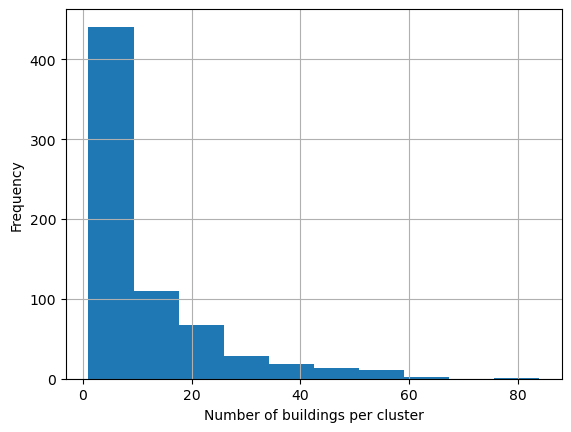

There are 685 green buildings.


In [6]:
import numpy as np

df = pd.read_csv('data/greenbuildings.csv')
print('Number of missing values:')
display(df.isna().sum())

# convert to object or bool
df = df.drop(columns = 'CS_PropertyID') # don't need
df['cluster'] = df['cluster'].astype('object')
cat_cols = ['LEED','Energystar', 'green_rating', 'class_a', 
            'class_b', 'renovated', 'amenities', 'net']
df[cat_cols] = df[cat_cols].astype('bool')
print(f'\nNumber of unique clusters: {df['cluster'].nunique()}\n')

# how many buildings per cluser
print('Nummber of buildings per cluster')
df.groupby('cluster').size().hist()
plt.xlabel('Number of buildings per cluster')
plt.ylabel('Frequency')
plt.show()

# check every cluster has at least one green building

# display(df.info())

# look at greenRating
df['green_rating'].unique()
print(f'There are {df['green_rating'].sum()} green buildings.')

# get numeric columns for later
num_cols = df.select_dtypes(include = 'number').columns
    
# # create pairplots
# sns.pairplot(df)

#### Occupancy
**Maybe remove some of this because it's not all necessary**

First I am going to verify that the low occupancy buildings should be removed.

If I'm assuming that the low occupancy buildings had something abnormal about them and should be removed, I want to first make sure that these buildings are not disproportionately green. This would indicate there is something wrong with some green buildings leading to low occupancy.

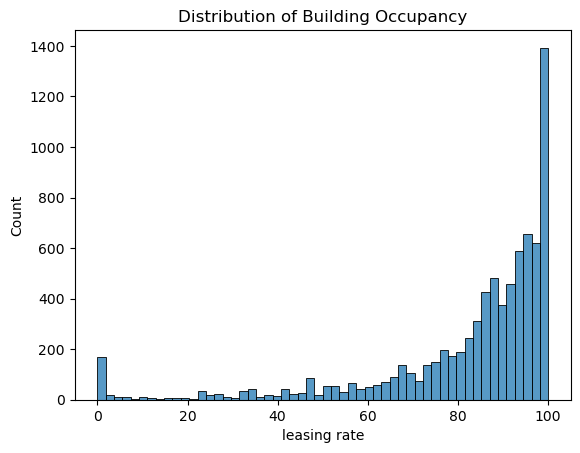

There are 215 buildings with less than 10% occupancy.
Of the buildings with less than 10% occupancy, this is how many are not green vs. green.


green_rating
False    214
True       1
Name: count, dtype: int64

In [7]:
# check that the low occupancy buildings should be removed

# how many low occupancy buildings ---------------------------------------------------------
# sns.kdeplot(df['leasing_rate'])
# plt.show()
sns.histplot(df['leasing_rate'])
plt.title('Distribution of Building Occupancy')
plt.xlabel('leasing rate')
plt.show()
print(f'There are {(df['leasing_rate'] < 10).sum()} buildings with less than 10% occupancy.')

# are the low occupancy buildings green buildings? -----------------------------------------
print('Of the buildings with less than 10% occupancy, this is how many are not green vs. green.')
display(df.loc[df['leasing_rate'] < 10, 'green_rating'].value_counts())

The low occupancy buildings are mostly not green, so if I drop the low occupancy buildings, I will not be ignoring potential issues with green buildings. It's also pretty abnormal for a building to have less than 10% occupancy, so there is likely something unusual about these buildings that leads to their low occupancies. However, I want to double check if the data reveals anything abnormal about these low occupancy buildings before deciding to remove them.

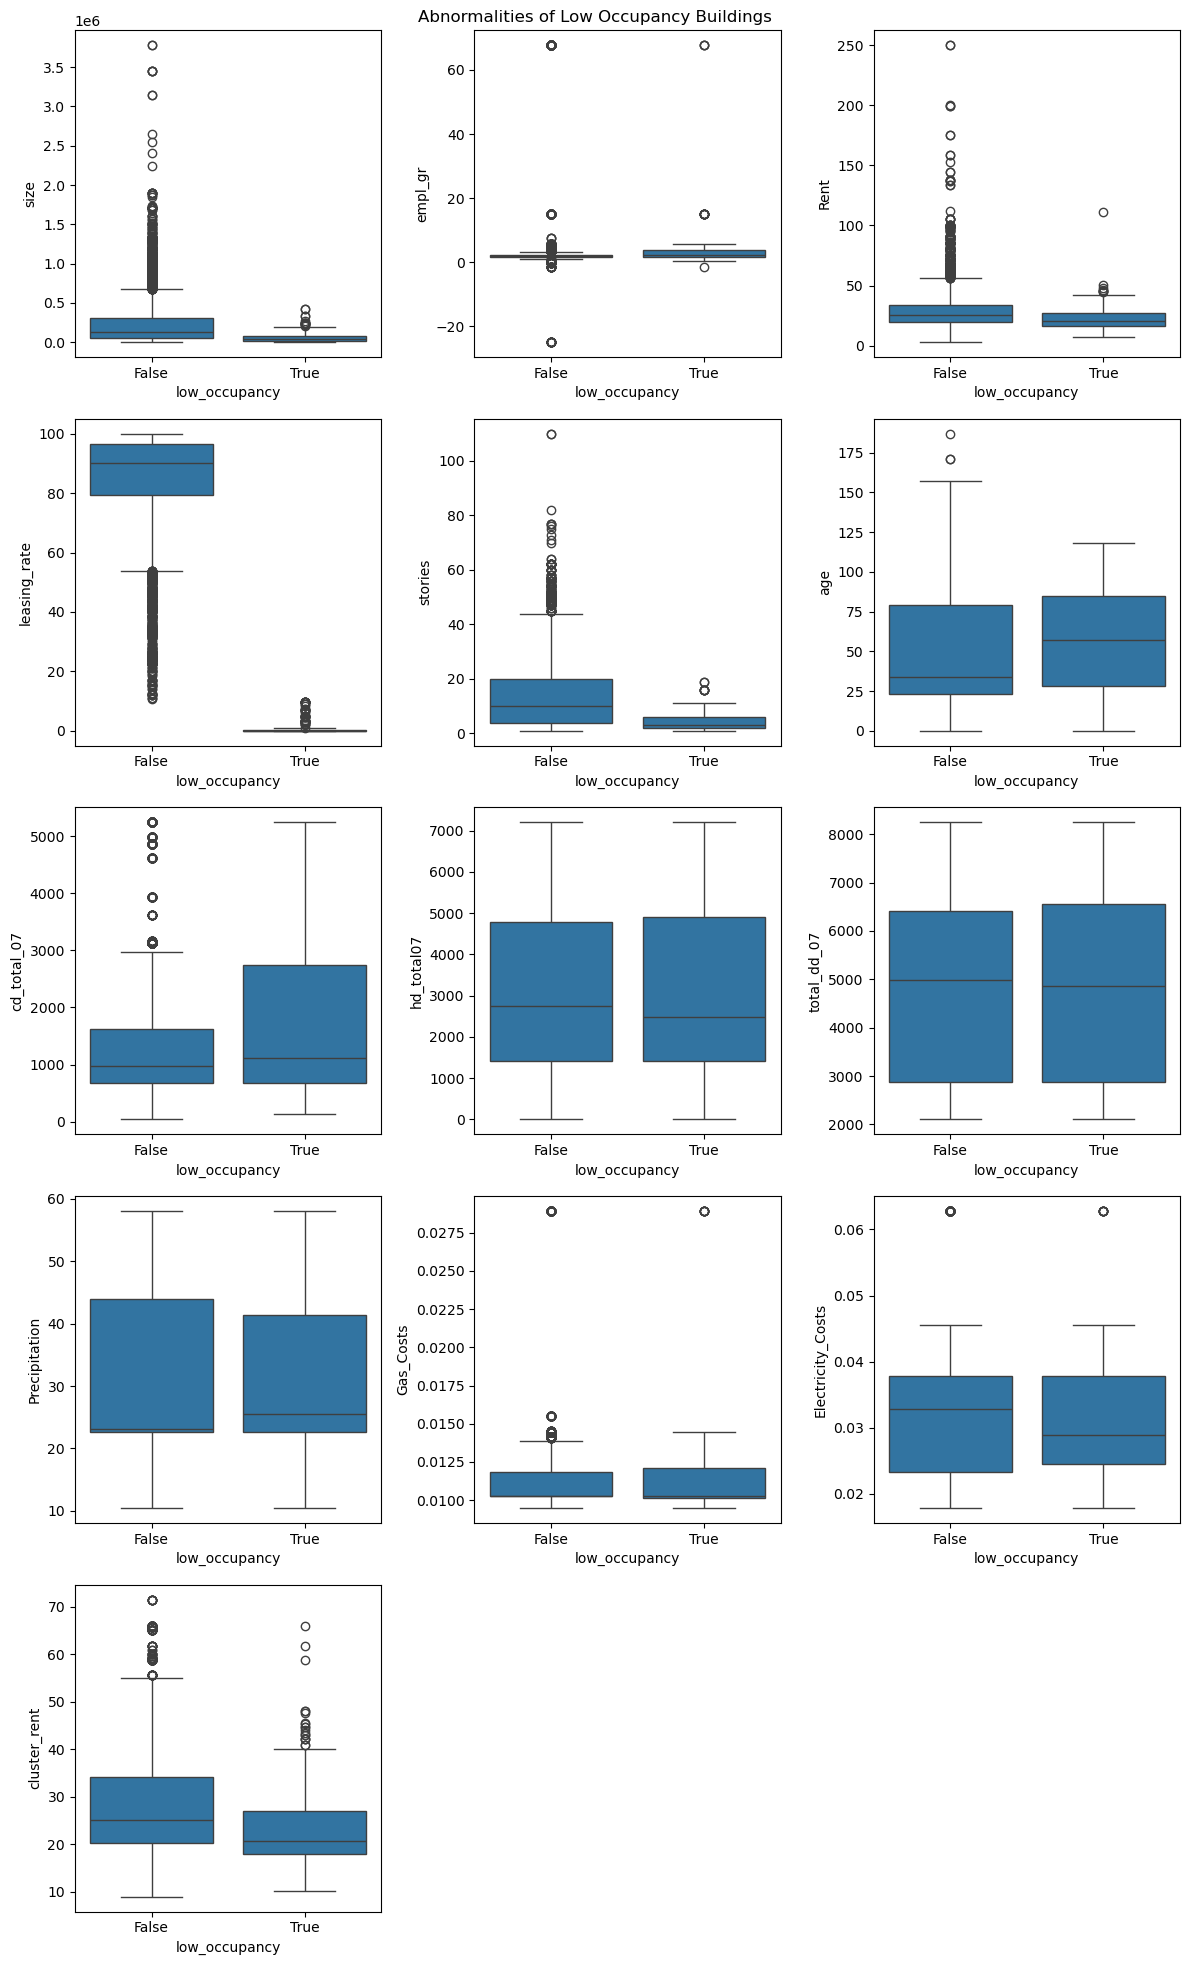

In [8]:
# Plot: what is abnormal about the low occupancy buildings? --------------------------------
df['low_occupancy'] = df['leasing_rate'] < 10
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))

# boxplot
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex = False, sharey = False)
axes = axes.flatten()              
for i, col in enumerate(num_cols):
    sns.boxplot(data = df, y=col, x='low_occupancy', ax = axes[i])
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Abnormalities of Low Occupancy Buildings')
plt.tight_layout()
plt.show()

# altnerate kdeplot
# fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex = False, sharey = False)
# axes = axes.flatten()              
# for i, col in enumerate(num_cols):
#     sns.kdeplot(data = df, x=col, hue='low_occupancy', common_norm=False, ax = axes[i])
# for j in range(len(num_cols), len(axes)):
#     fig.delaxes(axes[j])
# plt.tight_layout()
# plt.show()

The figure above displays the distribution of each numeric feature split dependent on having low occupancy. The boxplots display the quartiles in the data. The bottom of lower limit to the box represents the lowest quartile (0 percentil to 25th percentile), the box represents the interquartile range (IQR, 25th percentile to 75th percentile) with the median somewhere in the middle, and top of the box to the upper limit represents the top quartile (75th percentile to 100th percentile). The upper and lower quartiles are limited to 1.5*IQR, so any points outside of this are identified as outliers. Building with low occupancy (less than 10%) are indicated by true. You can see that buildings with low occupancy are generally smaller, have a higher employment growth rate in their region, lower rent, fewer stories, older, more cooling days, similar heating days, similar total heating/cooling days, similar precipitation, similar gas costs, similar electricity costs, and lower rent within the building's regional market. I check the difference in the categorical variables for low occupancy buildings before making the final decision to remove them.

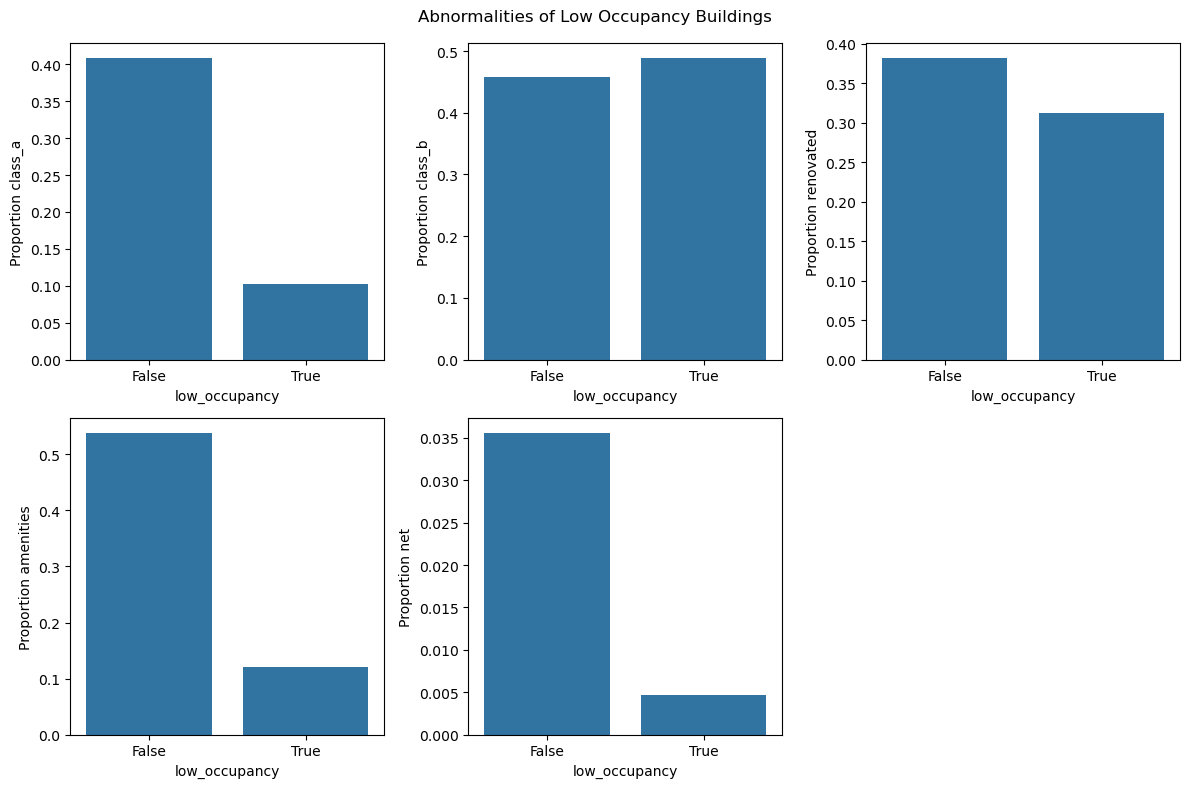

In [9]:
# bar plot
cat_cols2 = ['class_a','class_b', 'renovated', 'amenities', 'net']
grouped = df.groupby('low_occupancy')[cat_cols2].mean().reset_index()
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(12, 8), sharex = False, sharey = False)
axes = axes.flatten()              
for i, col in enumerate(grouped.columns[1:]):
    sns.barplot(data = grouped, y = col, x='low_occupancy', ax = axes[i])
    axes[i].set_ylabel(f'Proportion {col}')
fig.delaxes(axes[5])
plt.suptitle('Abnormalities of Low Occupancy Buildings')
plt.tight_layout()
plt.show()

The above figure displays the proportion of buildings with the category reflected on the y-axis split by the level of occupancy of the building. Low occupancy buildings (less than 10% occupancy) are indicated with "true" on the x-axis. From this, you can see that low occupacny buildings have a very low proportion of class a buildings, a higher proportion of class b buildings, unlikely to be renovated, unlikely to have ammenities, and a low proportion of net-rental contracts (utility costs are typically quoted in the rental contract).

There are potentially other factors related to the low occupancy of these buildings, but they're low occupancy is not related to them being green buildings since most of them are not green buildings. Therefore, I'd like to remove these buildings from the analysis to ensure outliers aren't affecting the results.

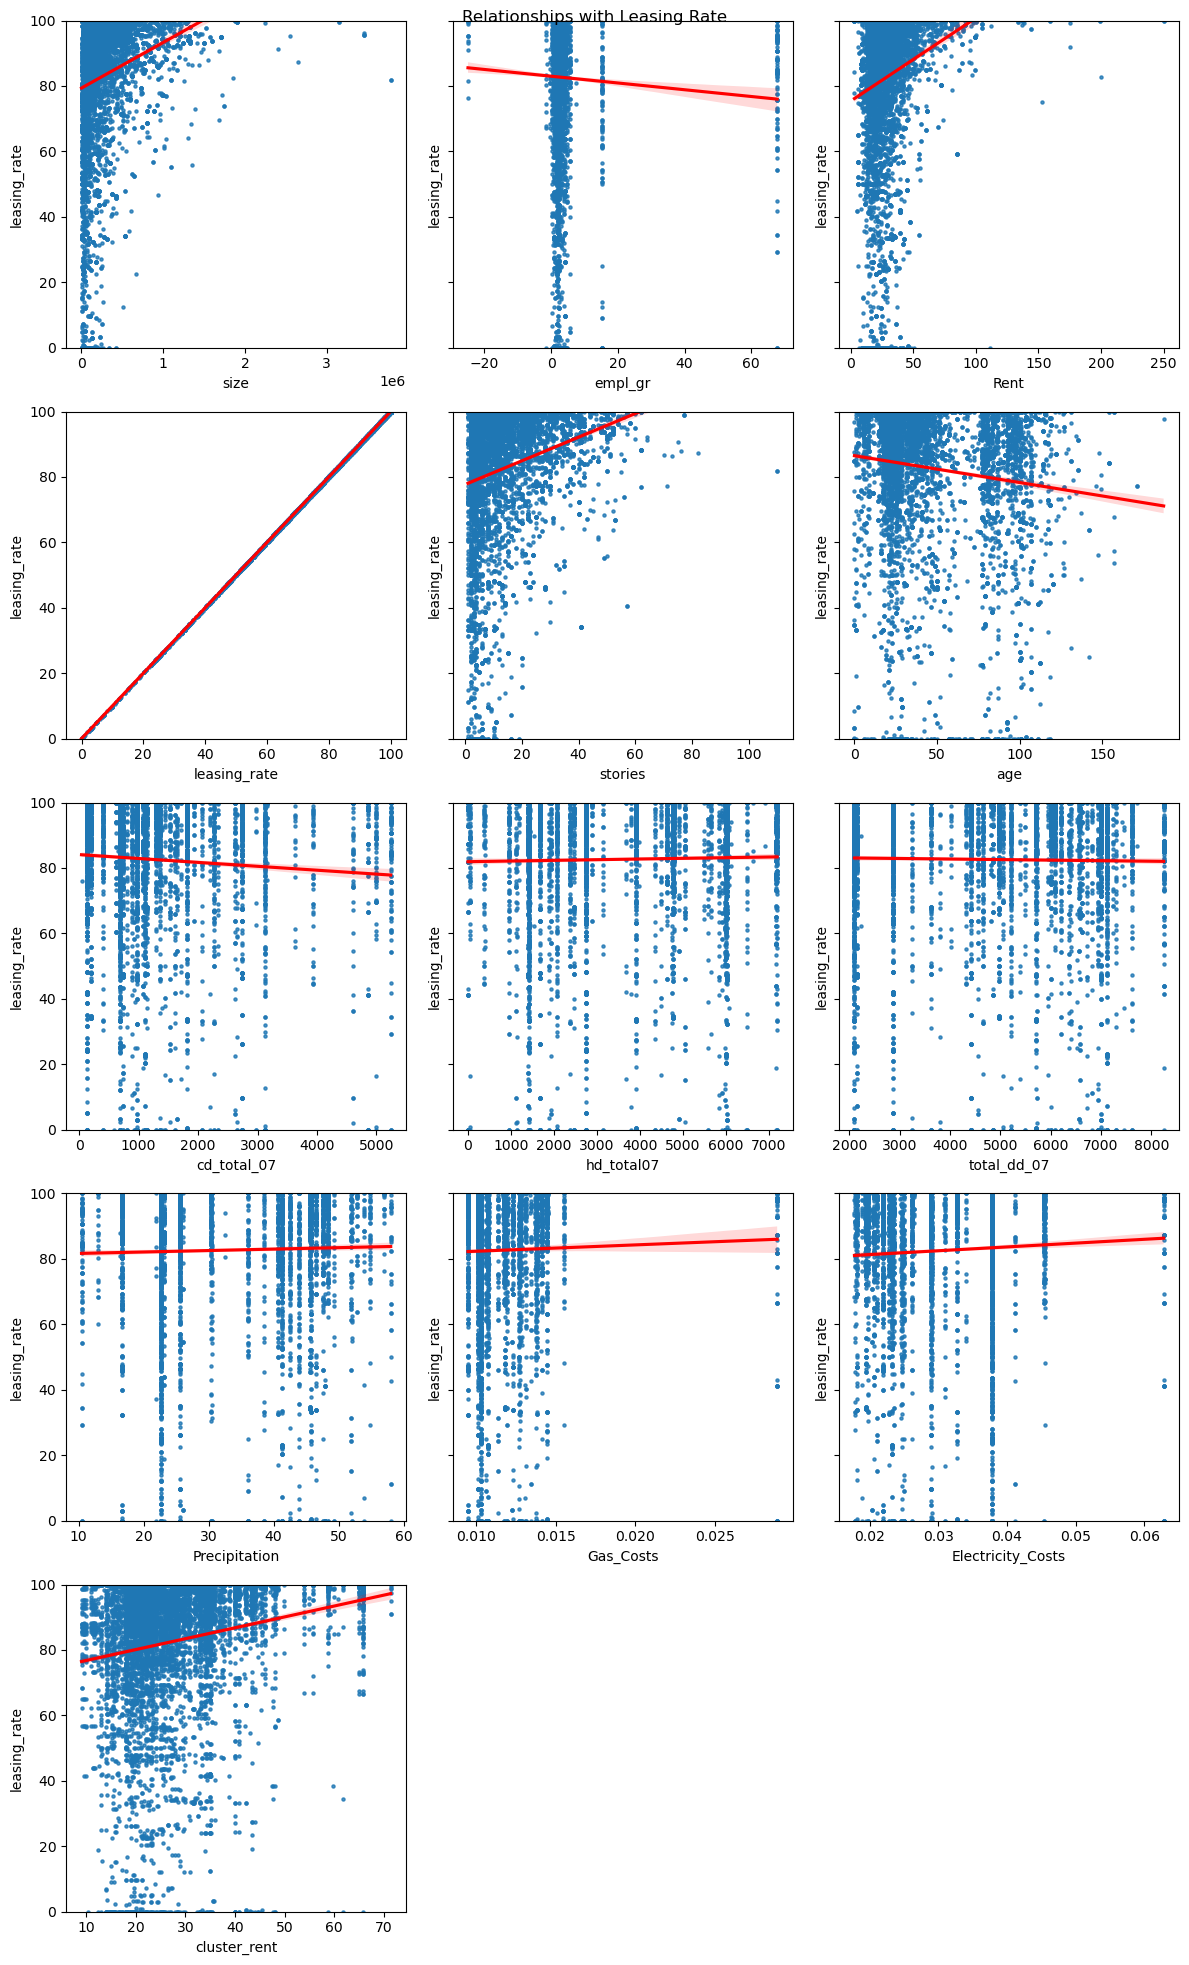

In [10]:
# can check scatterplots instead
df['low_occupancy'] = df['leasing_rate'] < 10
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))

# boxplot
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex = False, sharey = True)
axes = axes.flatten()              
for i, col in enumerate(num_cols):
    # sns.scatterplot(data = df, x=col, y='leasing_rate', ax = axes[i])
    sns.regplot(data=df, x=col, y='leasing_rate', scatter_kws={'s':5}, line_kws={'color':'red'}, ax = axes[i])
    y_limits = [df['leasing_rate'].min(), df['leasing_rate'].max()]
    axes[i].set_ylim(y_limits)  # Set y-axis limits
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Relationships with Leasing Rate')
plt.tight_layout()
plt.show()


In [11]:
# drop low occupancy buildings ------------------------------------------------------------
df = df[~df['low_occupancy']]
df = df.drop(columns = 'low_occupancy') # no longer needed

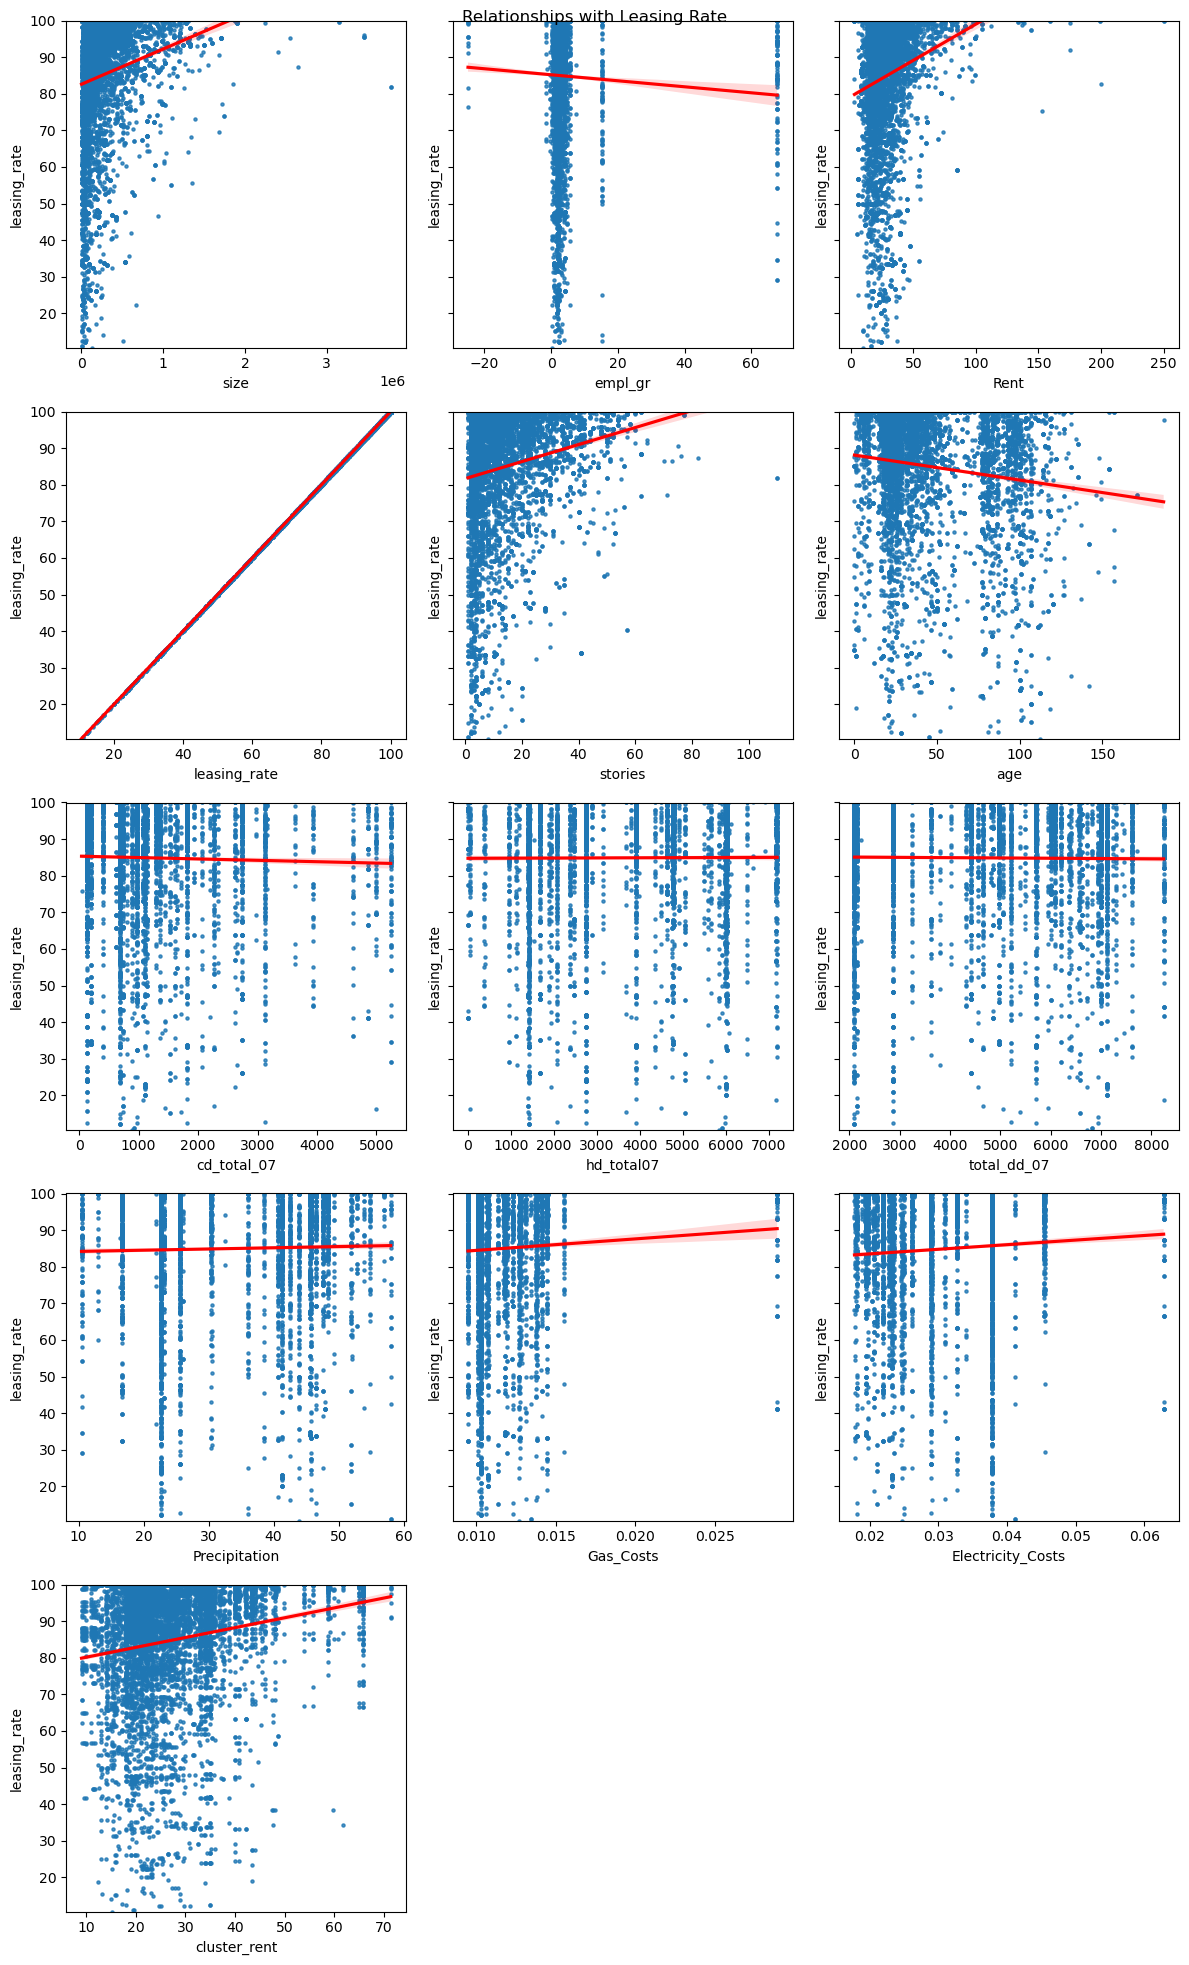

In [12]:
# compare scatterplots after dropping
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))

# boxplot
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex = False, sharey = True)
axes = axes.flatten()              
for i, col in enumerate(num_cols):
    # sns.scatterplot(data = df, x=col, y='leasing_rate', ax = axes[i])
    sns.regplot(data=df, x=col, y='leasing_rate', scatter_kws={'s':5}, line_kws={'color':'red'}, ax = axes[i])
    y_limits = [df['leasing_rate'].min(), df['leasing_rate'].max()]
    axes[i].set_ylim(y_limits)  # Set y-axis limits
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Relationships with Leasing Rate')
plt.tight_layout()
plt.show()

#### Compare Green vs. Not Green


Summary statistics for rent split by green rating:


count       mean        std   min      25%    50%    75%  \
green_rating                                                              
False         6995.0  28.444779  15.328287  2.98  19.4300  25.03  34.18   
True           684.0  30.028480  12.955452  8.87  21.4975  27.60  35.54   

                 max  
green_rating          
False         250.00  
True          138.07

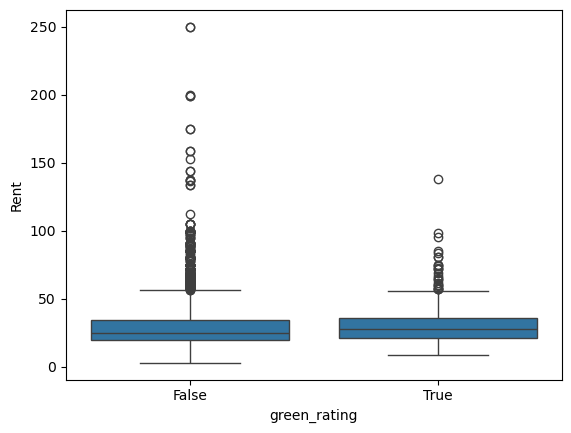

In [13]:
# compare rent across green vs. non green buildings
# no uncertainty accounted for previously
print('\nSummary statistics for rent split by green rating:')
display(df.groupby('green_rating')['Rent'].describe())
sns.boxplot(data = df, y = 'Rent', x = 'green_rating')
plt.show()

The boxplots above displays the quantiles and outliers for rent split by ordinary versus green building. There are many outliers with high rent for ordinary and green buildings, so the median is a more reliable measure of the central tendency. Green buildings do have a larger median rent, but this doesn't tell the whole story. This is a general pattern, and it may not hold true when comparing any two buildings. For example, if I compared ordinary building with maximum rent to the green building with maximum rent, the ordinary building would have a higher rent. Therefore, this analysis reveals that green buildings generally have higher rent, but there are additional factors that influence rent and can cause a reversal of this pattern. Next, I look at what else could influence rent to try to isolate the relationship of being green with rent.

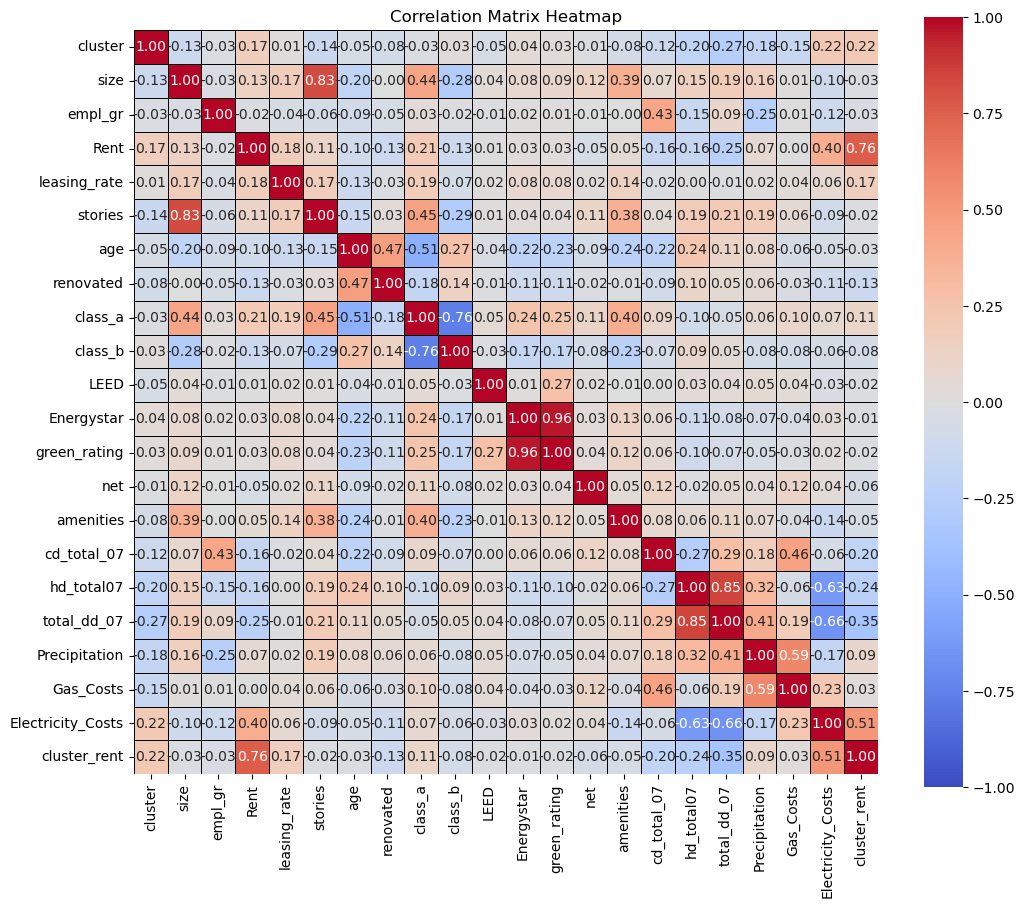

In [14]:
# Remove?

# correlation plot (what else is correlated with rent)
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f',
            square=True, linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix Heatmap')
plt.show()

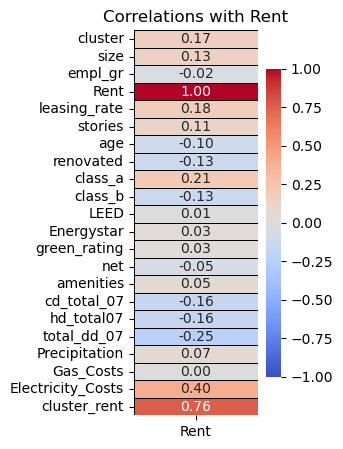

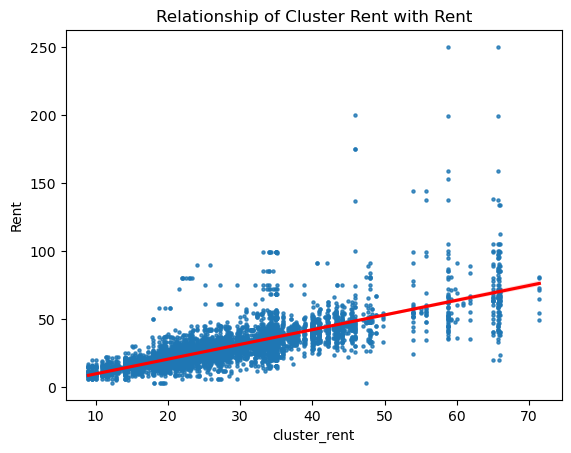

This is what is associated with rent within clusters


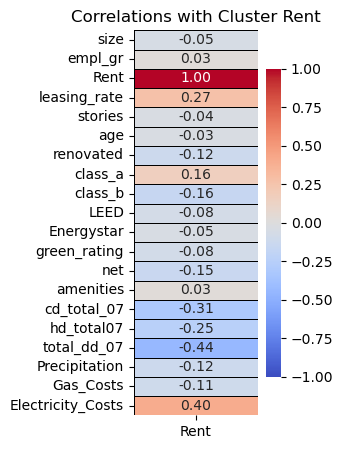

In [15]:
# Remove large correlation plot and all scatterplots?

# correlation plot (what else is correlated with rent)
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f',
#             square=True, linewidths=0.5, linecolor='black')
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# just correlations with rent
corr_matrix = df.corr()
target_corr = corr_matrix[['Rent']].copy() 
plt.figure(figsize=(2, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f',
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title(f'Correlations with Rent')
plt.show()

# relationship of cluster rent with rent
sns.regplot(data = df, x = 'cluster_rent', y = 'Rent', scatter_kws={'s':5}, line_kws={'color':'red'})
plt.title('Relationship of Cluster Rent with Rent')
plt.show()

# what is associated within clusters with rent
grouped = df.drop(columns = ['cluster_rent']).groupby('cluster').mean()
# just correlations with rent
print('This is what is associated with rent within clusters')
corr_matrix = grouped.corr()
target_corr = corr_matrix[['Rent']].copy() 
plt.figure(figsize=(2, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f',
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title(f'Correlations with Cluster Rent')
plt.show()

# sns.regplot(data = df, x = 'Electricity_Costs', y = 'Rent', scatter_kws={'s':5}, line_kws={'color':'red'})
# plt.show()

# scatterplots
# ncols = 3
# nrows = int(np.ceil(len(num_cols) / ncols))
# fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex = False, sharey = True)
# axes = axes.flatten()              
# for i, col in enumerate(num_cols):
#     # sns.scatterplot(data = df, x=col, y='leasing_rate', ax = axes[i])
#     sns.regplot(data=df, x=col, y='Rent', scatter_kws={'s':5}, line_kws={'color':'red'}, ax = axes[i])
#     y_limits = [df['Rent'].min(), df['Rent'].max()]
#     axes[i].set_ylim(y_limits)  # Set y-axis limits
# for j in range(len(num_cols), len(axes)):
#     fig.delaxes(axes[j])
# plt.suptitle('Relationships with Rent')
# plt.tight_layout()
# plt.show()

The first figure displays the correlation of rent with all the other variables in the dataset. Cluster rent (the average rent for building's local market) is the most strongly correlated with rent (r = 0.76.). As a building's cluster rent increases, then its rent is likely to increase too. This is further illustrated in the scatterplot. Rent appears to be related more to a building's locale than to it's green rating. I broke down how the average cluster features are related to the cluster's average rent in the bottom correlation plot. A cluster's total days using temperature control and electricity costs were the most related to its rent. This is because electricity costs are included in rent, and climate control is a huge contributor to electricity usage. Buildings in the same area experience similar weather, so they are likely to use climate control similarly.

Accordingly, I'm going to remove the effect of locale (added electricity costs due to local weather) on rent by determining the percent difference between each building's rent and cluster rent. I can use this new variable, which I'm calling "local rent premium" to ascertain the relationship of green rating with rent.

Descriptive statistics for local rent premium for ordinary vs. green buildings:


count      mean       std       min    25%       50%       75%  \
green_rating                                                                    
False         6995.0  0.024858  0.297329 -0.936842 -0.125  0.000000  0.122251   
True           684.0  0.118394  0.223647 -0.503311  0.000  0.083333  0.219137   

                   max  
green_rating            
False         3.350663  
True          1.804947

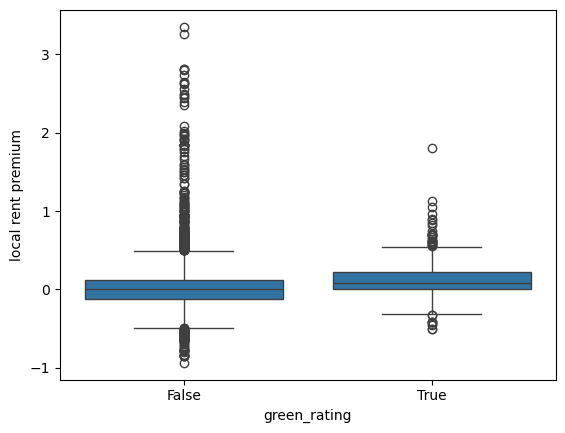

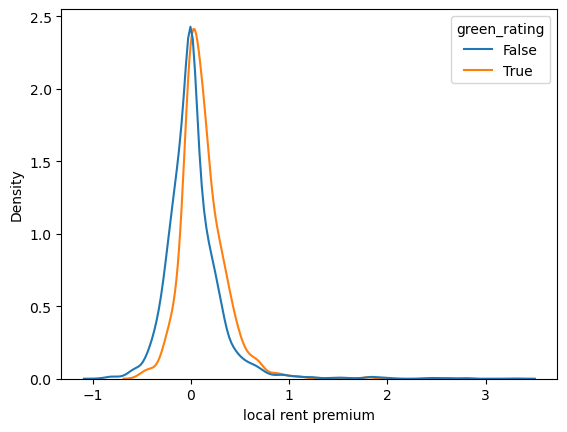

This table displays what proportion of the ordinary vs. green buildings command a local rent premium.


green_rating  percent local rent premium
0         False                   45.389564
1          True                   67.105263

In [16]:
# look at how much greater rent is than cluster average (accounts for building's local market)
df['local rent premium'] = (df['Rent'] - df['cluster_rent']) / df['cluster_rent']

# boxplot
print('Descriptive statistics for local rent premium for ordinary vs. green buildings:')
display(df.groupby('green_rating')['local rent premium'].describe())
sns.boxplot(data = df, y = 'local rent premium', x = 'green_rating')
plt.show()

# kde plot
sns.kdeplot(data = df, x = 'local rent premium', hue = 'green_rating', common_norm = False)
plt.show()
# proportion above 0
df['positive local rent premium'] = df['local rent premium'] > 0
rent_premium = df.groupby('green_rating')['positive local rent premium'].mean() * 100
rent_premium = rent_premium.reset_index().rename(columns = {'positive local rent premium':'percent local rent premium'})
print('This table displays what proportion of the ordinary vs. green buildings command a local rent premium.')
display(rent_premium)

In the above plots, I have used the local rent premium (percent difference in a building's rent compared to its local market) to display the difference in rent between ordinary and green buildings while accounting local factors related to rent. The rent premium commanded by green buildings becomes more apparent now, given the shifted green distributions in the box plot and KDE plot. In comparison to their local market, green buildings have a median rent premium of 8.33% whereas ordinary buildings have a median rent premium of 0%. It's still necessary to use the median to measure central tendency because there are many outliers in the boxplot.  There is still some uncertainty regarding whether or not a green building will command a premium rent given the wide distribution of rent premium. While the green buildings are more likely to command a local rent premium, they only have a premium 67.1% percent of the time, that's 47.8% more than how often ordinary buildings command a premium (45.4%). There are still more factors to control for that contribute to the rent of a building. Therefore, I look at how the difference between a building's features and its cluster average for that feature determine it's rent premium.

This is what is associated with local rent premium


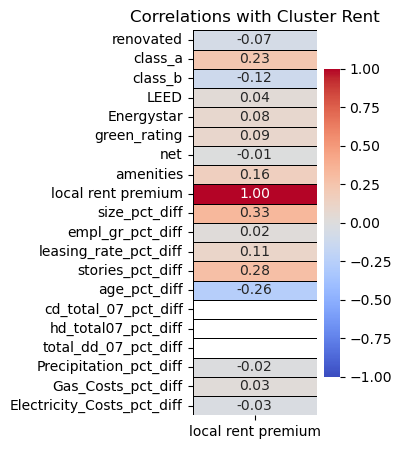

This is what is associated with green rating


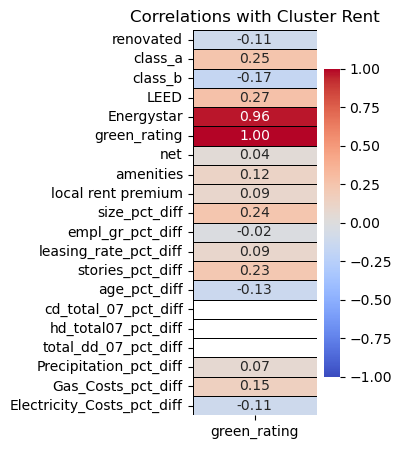

In [17]:
# summarize clusters and get building differences by cluster to determine what is most related with local rent premium
# are those things related to be being a green building?
cols = ['size', 'empl_gr', 'leasing_rate', 'stories', 'age',
       'cd_total_07', 'hd_total07', 'total_dd_07', 'Precipitation',
       'Gas_Costs', 'Electricity_Costs']
grouped = df.groupby('cluster')[cols].mean()
df_with_means = df.merge(grouped, on='cluster', suffixes=('', '_mean'))
for col in cols:
    df_with_means[f'{col}_pct_diff'] = 100 * (df_with_means[col] - df_with_means[f'{col}_mean']) / df_with_means[f'{col}_mean']
df_with_means = df_with_means.drop(columns=[f'{col}_mean' for col in cols])
cols = ['renovated', 'class_a', 'class_b', 'LEED', 'Energystar', 'green_rating',
       'net', 'amenities','local rent premium', 'size_pct_diff',
       'empl_gr_pct_diff', 'leasing_rate_pct_diff', 'stories_pct_diff',
       'age_pct_diff', 'cd_total_07_pct_diff', 'hd_total07_pct_diff',
       'total_dd_07_pct_diff', 'Precipitation_pct_diff', 'Gas_Costs_pct_diff',
       'Electricity_Costs_pct_diff']
df_with_means = df_with_means[cols]

# correlation plot
print('This is what is associated with local rent premium')
corr_matrix = df_with_means.corr()
target_corr = corr_matrix[['local rent premium']].copy() 
plt.figure(figsize=(2, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f',
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title(f'Correlations with Cluster Rent')
plt.show()

print('This is what is associated with green rating')
corr_matrix = df_with_means.corr()
target_corr = corr_matrix[['green_rating']].copy() 
plt.figure(figsize=(2, 5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f',
            linewidths=0.5, linecolor='black', cbar_kws={'shrink': 0.8})
plt.title(f'Correlations with Cluster Rent')
plt.show()

The above correlation displays what factors within cluster are related with the local rent premium. All of the numeric features were converted to be relative to the average value for the cluster, and those new features are identified by the suffix "pct_diff." The cooling days, heatings days, and total days of heating and cooling are blank because there is no difference amongst clusters on this feature. Therefore, I was successful in removing the local effect of temperature, climate control, and resulting energy costs on rent. When buildings share the same climate, the purported benefits of a green building, reduced energy costs, are no longer that important, hence the low correlation of electricity costs (r = -0.03). One of the other supposed benefits of being a green building, attracting more tenants, is only slightly related to having a local rent premium (r = 0.11), and green buildings are only slightly more likely to attract more tenants than the cluster average (r = 0.09).

Instead of green ratings, the features that are now popping out as being relatively strongly related to local rent premium are larger size than cluster (r = 0.33), more stories than cluster (r = 0.28), and younger age than cluster (r = -0.26). I can also see that the rent premium commanded by green buildings is actually more likely due to that green buildings are more likely to be larger in size than their cluster (r = .24), have more stories (r = .23), and be younger in age (r = -0.13). This information was pulled from the lower correlation plot.

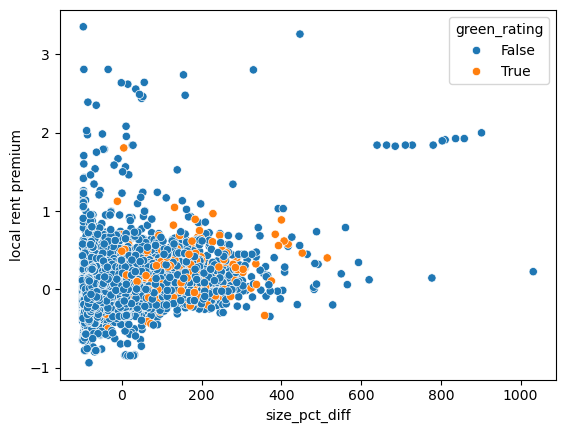

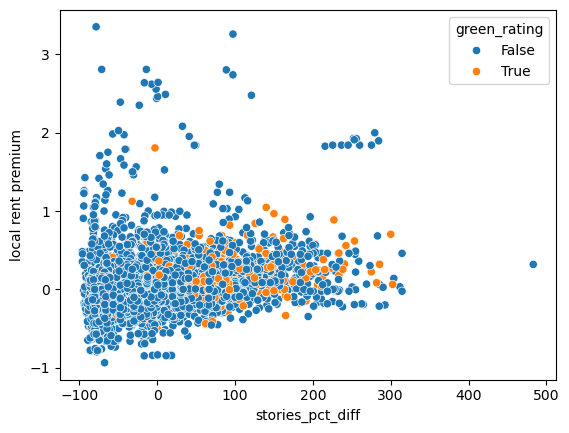

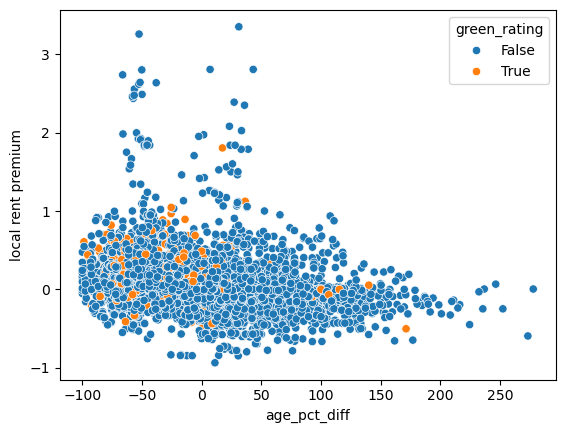

In [18]:
# plot the 3 most important factors on x-axis with rent premium on y and colored by green rating
sns.scatterplot(data = df_with_means, x = 'size_pct_diff', y = 'local rent premium', hue = 'green_rating')
plt.show()
sns.scatterplot(data = df_with_means, x = 'stories_pct_diff', y = 'local rent premium', hue = 'green_rating')
plt.show()
sns.scatterplot(data = df_with_means, x = 'age_pct_diff', y = 'local rent premium', hue = 'green_rating')
plt.show()

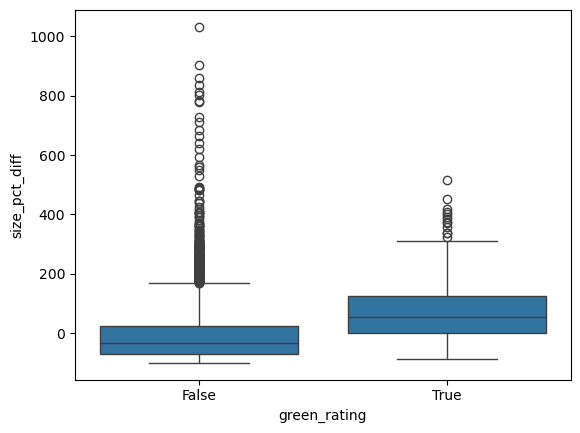

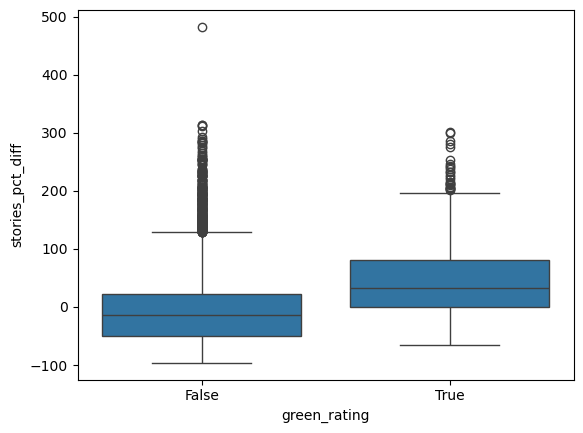

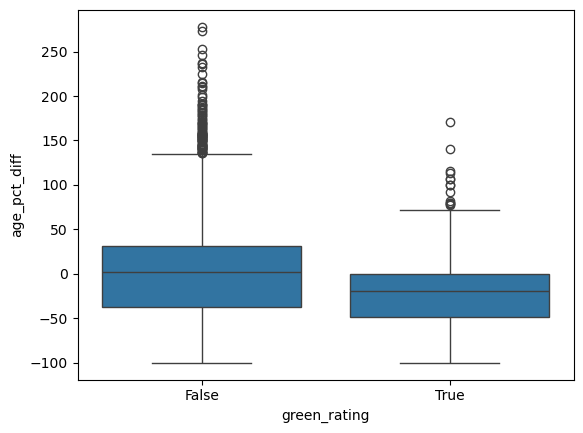

In [19]:
# plot the 3 most important factors on x-axis with rent premium on y and colored by green rating
sns.boxplot(data = df_with_means, y = 'size_pct_diff', x = 'green_rating')
plt.show()
sns.boxplot(data = df_with_means, y = 'stories_pct_diff', x = 'green_rating')
plt.show()
sns.boxplot(data = df_with_means, y = 'age_pct_diff', x = 'green_rating')
plt.show()

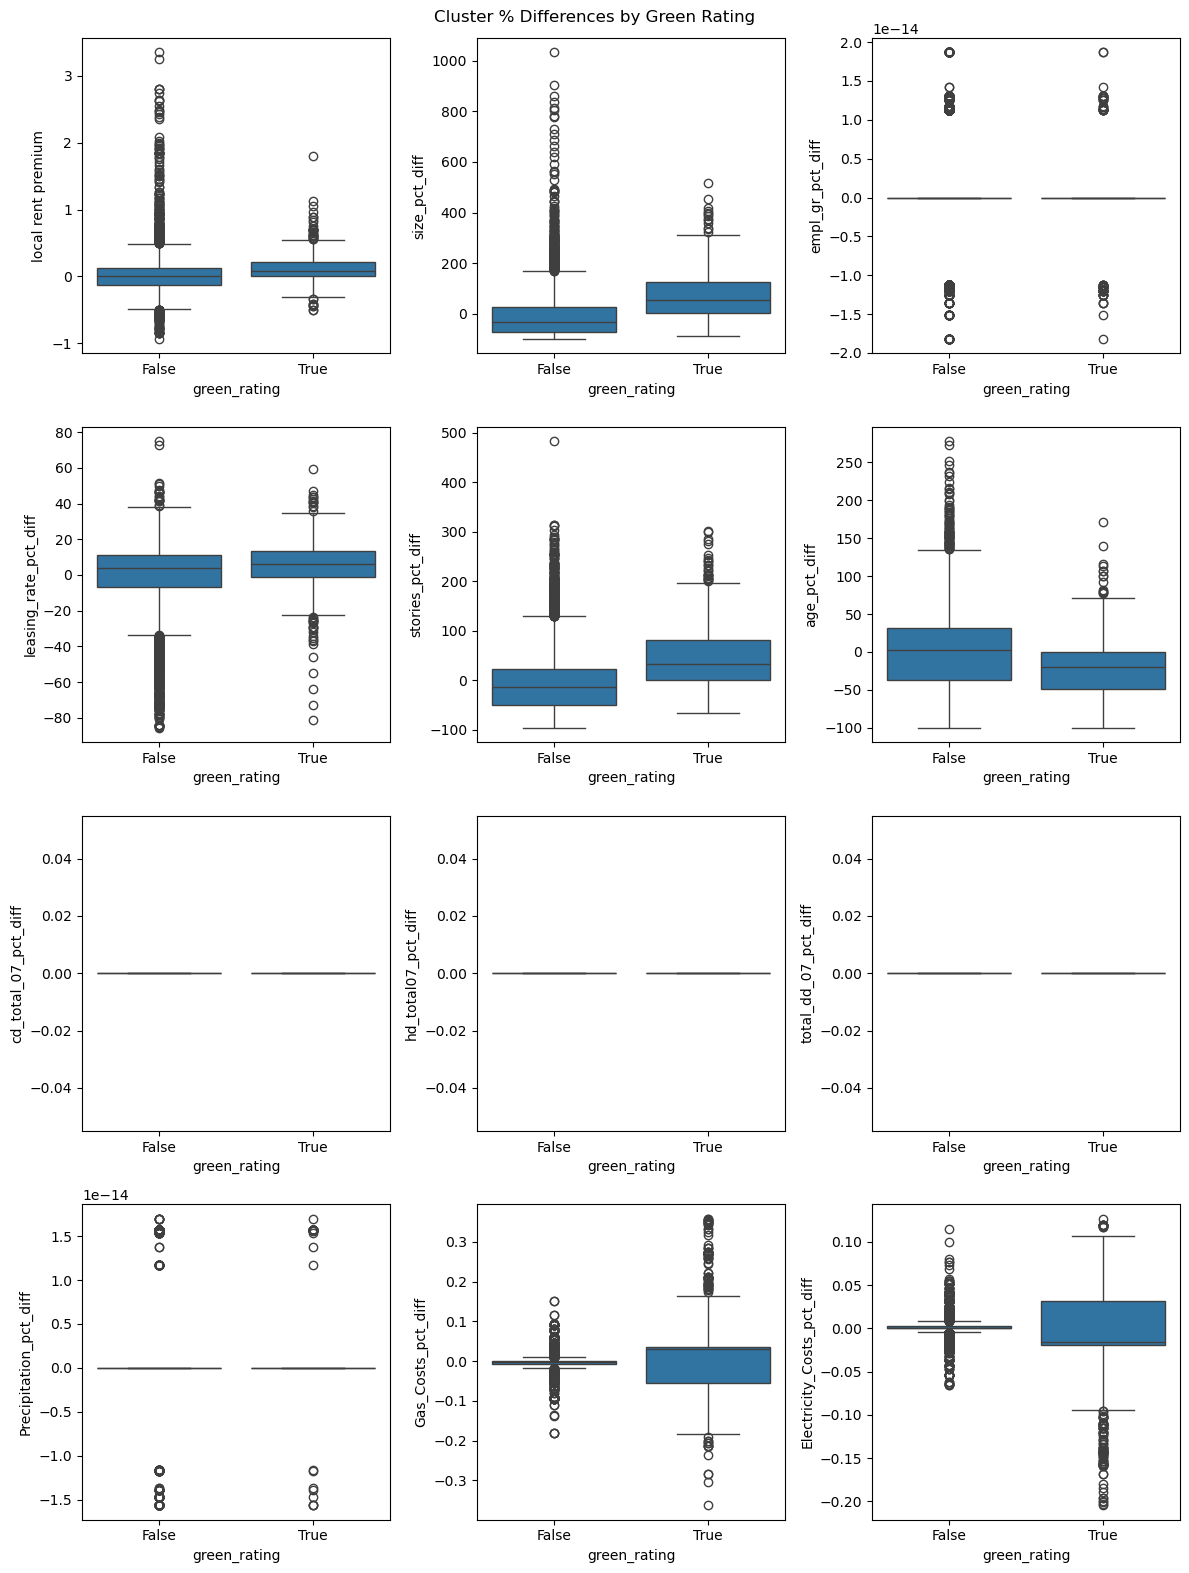

In [20]:
# displays what I showed in the correlation plot a little more visually
# should I use this instead?

num_cols = df_with_means.select_dtypes(include = 'number').columns
ncols = 3
nrows = int(np.ceil(len(num_cols) / ncols))

# boxplot
fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 4), sharex = False, sharey = False)
axes = axes.flatten()              
for i, col in enumerate(num_cols):
    sns.boxplot(data = df_with_means, y=col, x='green_rating', ax = axes[i])
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Cluster % Differences by Green Rating')
plt.tight_layout()
plt.show()

After all this exploration, my final recommendation is that you don't move forward with a green building. The difference in rent discovered by your intern did not account for confounding factors such as the regional weather. After looking at the local rent premium to remove the effect of regional weather on electricity costs that make up a large proportion of rent, gren buildings did appear to have a larger local rent premium. However, there were other factors associated with green buildings, aside from it purported benefits, that actually accounted for increased local rent premium--namely size, stories, and age. Green buildings happened to be larger in size, have more stories, and be younger than their cluster, and this was likely driving most of the difference in rent. Therefore, you should focus on building a large building with many stories, and you will naturally have a younger building that commands a rent premium and earns you more revenues.

## Clustering and Dimensionality Reduction

<div class="gray">
The data in wine.csv (../data/wine.csv) contains information on 11 chemical properties of 6500 different bottles of
vinho verde wine from northern Portugal. In addition, two other variables about each wine are recorded: 
    
- whether the wine is red or white
- the quality of the wine, as judged on a 1-10 scale by a panel of certified wine snobs.

Run PCA, tSNE, and any clustering algorithm of your choice on the 11 chemical properties (or suitable
transformations thereof) and summarize your results. Which dimensionality reduction technique makes the most
sense to you for this data? Convince yourself (and me) that your chosen approach is easily capable of
distinguishing the reds from the whites, using only the “unsupervised” information contained in the data on
chemical properties. Does your unsupervised technique also seem capable of distinguishing the higher from the
lower quality wines? Present appropriate numerical and/or visual evidence to support your conclusions.
To clarify: I’m not asking you to run a supervised learning algorithms. Rather, I’m asking you to see whether the
differences in the labels (red/white and quality score) emerge naturally from applying an unsupervised technique
to the chemical properties. This should be straightforward to assess using plots
</div>

In [32]:
# load in the data
wine = pd.read_csv('data/wine.csv')
chem_props = wine.drop(columns = ['quality', 'color'])

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

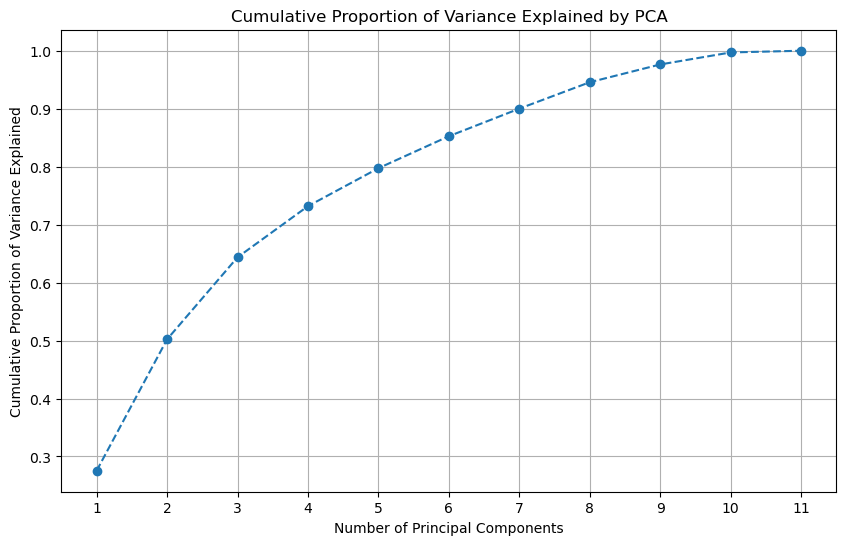

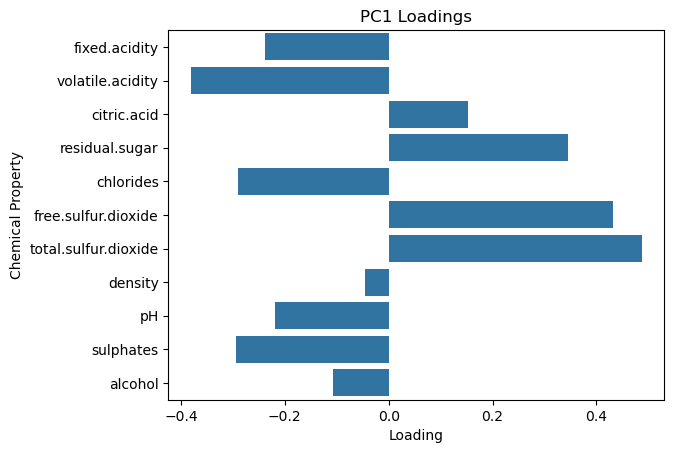

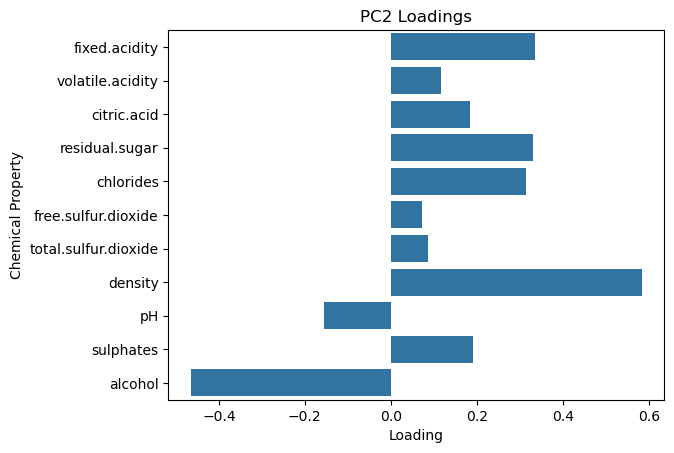

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# scale
scaler = StandardScaler()
scaled_chem_props = scaler.fit_transform(chem_props)

# get principal components
pca = PCA()
pca_chem_props = pca.fit_transform(scaled_chem_props)
pca_chem_props_df = pd.DataFrame(data = pca_chem_props, columns = ['PCA1','PCA2', 'PCA3', 'PCA4', 
                                                                   'PCA5', 'PCA6', 'PCA7', 'PCA8',
                                                                   'PCA9', 'PCA10', 'PCA11'])

# determine best number of PCs
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Cumulative Proportion of Variance Explained by PCA')
plt.grid(True)
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.show()

# keep 6 PCs since they account for > 80% of the original variance
pca_chem_props_df = pca_chem_props_df[['PCA1','PCA2', 'PCA3', 'PCA4','PCA5', 'PCA6']]

# visualize loadings
PC1_loadings = pca.components_[0]
PC1_loadings_df = pd.DataFrame({'Chemical Property':chem_props.columns, 'Loading':PC1_loadings})
sns.barplot(data = PC1_loadings_df, x = 'Loading', y = 'Chemical Property')
plt.title('PC1 Loadings')
plt.show()

PC2_loadings = pca.components_[1]
PC2_loadings_df = pd.DataFrame({'Chemical Property':chem_props.columns, 'Loading':PC2_loadings})
sns.barplot(data = PC2_loadings_df, x = 'Loading', y = 'Chemical Property')
plt.title('PC2 Loadings')
plt.show()

# tSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(scaled_chem_props) # run on standardized data

I decided to use 6 principal components to represent the original data because this accounts for more than 805 of the original variance in the data while reducing its dimensionality. I use these principal components to perform clustering.

**Remove this?** The first principal component represents the contrasts the chemical properties with negative loadings in the first graph with the positive loadings in the first graph. Larger chemical properties with positive loadings and the smaller chemical properties with negative loadings will leading to larger values on the first PC. The same can be said for the second PC.

#### Wine Type Clusters

In [89]:
from sklearn.cluster import KMeans

# cluster on PCs
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state = 0)
kmeans.fit(pca_chem_props_df)
labels = kmeans.labels_

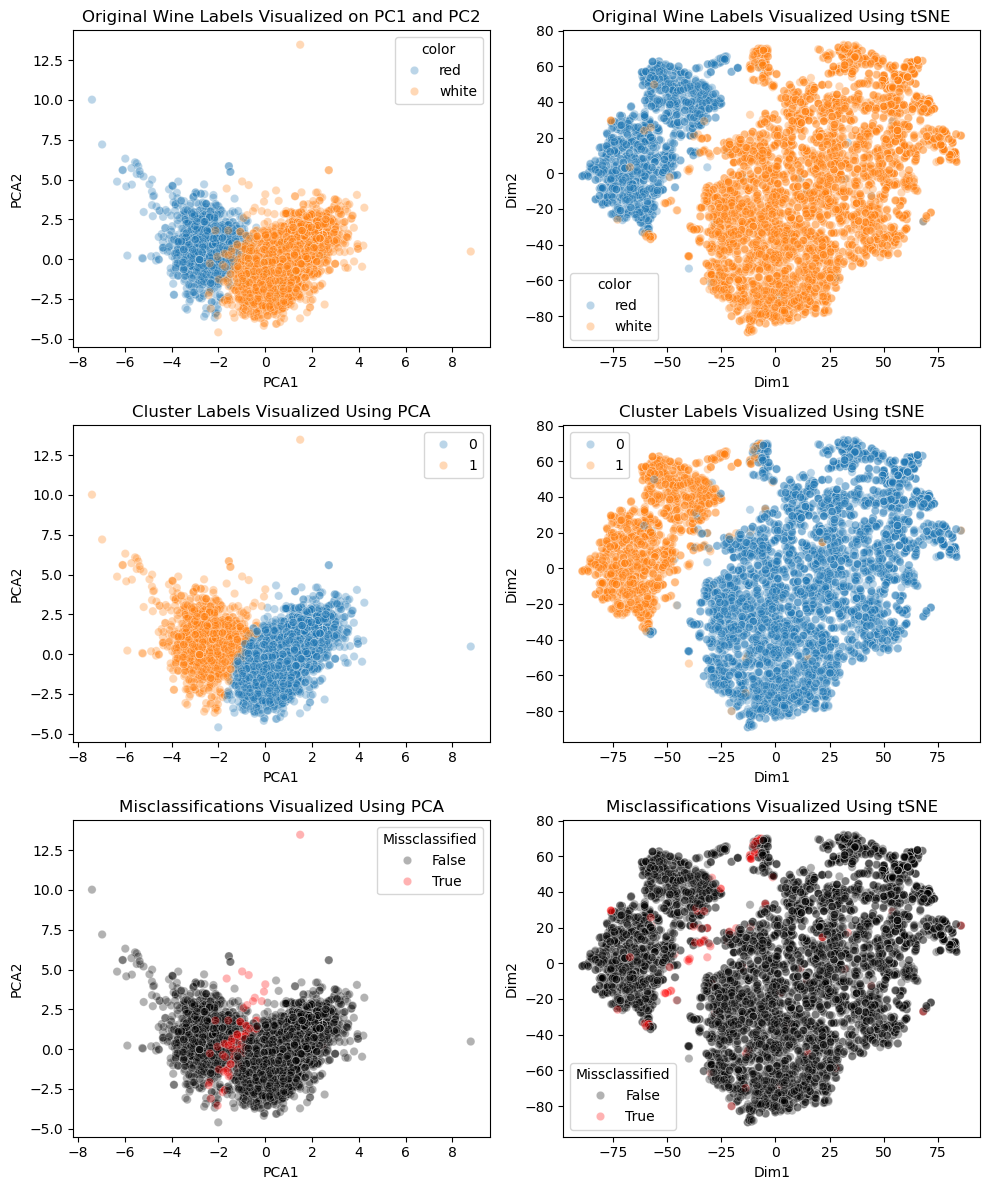

The unsupervised cluster labels mapped onto the wine type 98.45% of the time


In [90]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(10, 12))
axes = axes.flatten()

# visualize original labels using PCA
sns.scatterplot(x = pca_chem_props_df['PCA1'], y = pca_chem_props_df['PCA2'], alpha = 0.3, hue = wine['color'], ax = axes[0])
axes[0].set_title('Original Wine Labels Visualized on PC1 and PC2')

# visualize original labels using tSNE
sns.scatterplot(x = tsne_results[:, 0], y = tsne_results[:, 1], alpha = 0.3, hue = wine['color'], ax = axes[1])
axes[1].set_title('Original Wine Labels Visualized Using tSNE')
axes[1].set_xlabel('Dim1')
axes[1].set_ylabel('Dim2')

# visualize cluster results using PCA
sns.scatterplot(x = pca_chem_props_df['PCA1'], y = pca_chem_props_df['PCA2'], alpha = 0.3, hue = labels, ax = axes[2])
axes[2].set_title('Cluster Labels Visualized Using PCA')

# visualize cluster results using tSNE
sns.scatterplot(x = tsne_results[:, 0], y = tsne_results[:, 1], alpha = 0.3, hue = labels, ax = axes[3])
axes[3].set_title('Cluster Labels Visualized Using tSNE')
axes[3].set_xlabel('Dim1')
axes[3].set_ylabel('Dim2')

# get missclassifications
converted_labels = pd.Series(labels).replace({0:'white', 1:'red'})
misclassifications = converted_labels != wine['color']

# visualize difference in results using PCA
custom_palette = {True: 'red', False: 'black'}
sns.scatterplot(x = pca_chem_props_df['PCA1'], y = pca_chem_props_df['PCA2'], alpha = 0.3,
                hue = misclassifications, palette = custom_palette, ax = axes[4])
axes[4].legend(title='Missclassified')
axes[4].set_title('Misclassifications Visualized Using PCA')


# visualize difference in results using tSNE
sns.scatterplot(x = tsne_results[:, 0], y = tsne_results[:, 1], alpha = 0.3,
                hue = misclassifications, palette = custom_palette, ax = axes[5])
axes[5].set_title('Misclassifications Visualized Using tSNE')
axes[5].set_xlabel('Dim1')
axes[5].set_ylabel('Dim2')
axes[5].legend(title='Missclassified')

plt.tight_layout()
plt.show()

# Accuracy
acc = (converted_labels == wine['color']).mean() * 100
print(f'The unsupervised cluster labels mapped onto the wine type {acc:.2f}% of the time')

**Explain above graphs!**

#### Wine Quality Clusters
**Should I divide wines into high and low quality?**

In [ ]:
# cluster on PCs
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, random_state = 0)
kmeans.fit(pca_chem_props_df)
labels = kmeans.labels_

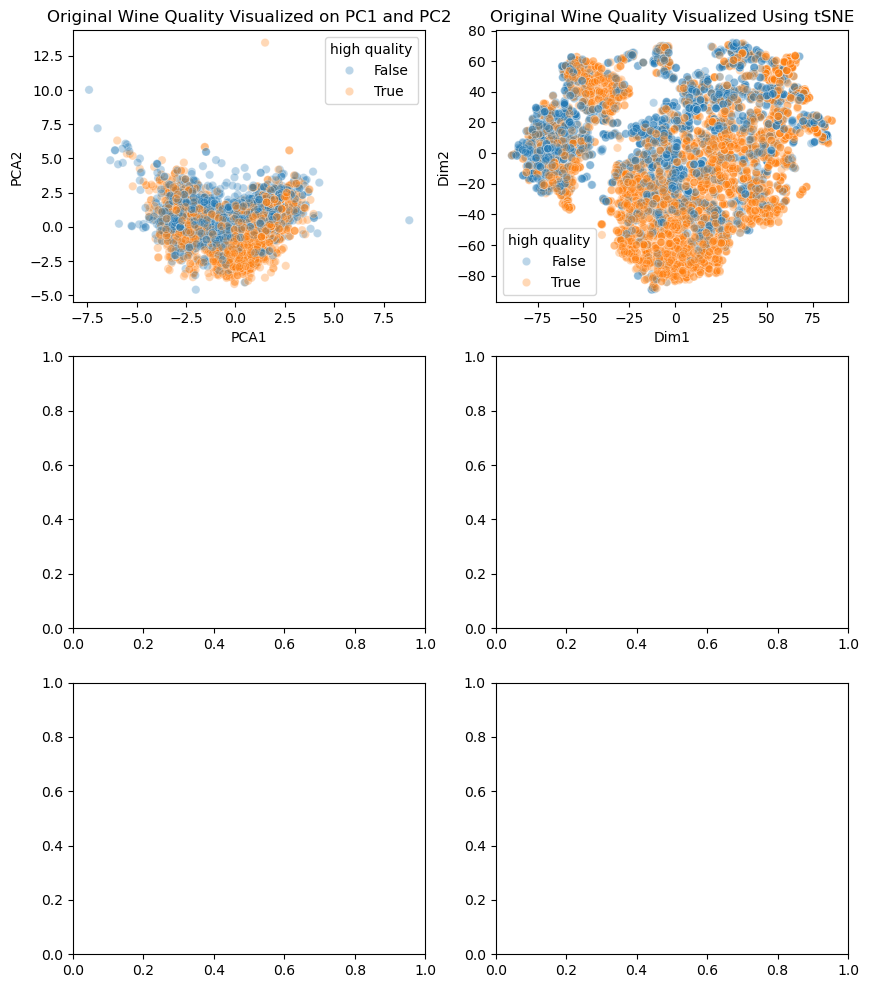

In [103]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(10, 12))
axes = axes.flatten()

high_quality = wine['quality'] > 5

# visualize original labels using PCA
sns.scatterplot(x = pca_chem_props_df['PCA1'], y = pca_chem_props_df['PCA2'], alpha = 0.3, hue = high_quality, ax = axes[0])
axes[0].set_title('Original Wine Quality Visualized on PC1 and PC2')
axes[0].legend(title = 'high quality')

# visualize original labels using tSNE
sns.scatterplot(x = tsne_results[:, 0], y = tsne_results[:, 1], alpha = 0.3, hue = high_quality, ax = axes[1])
axes[1].set_title('Original Wine Quality Visualized Using tSNE')
axes[1].set_xlabel('Dim1')
axes[1].set_ylabel('Dim2')
axes[1].legend(title = 'high quality')

## The Reuters Corpus